In [2]:
from squeze.squeze_common_functions import deserialize, load_json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
print("[?] Loading file...")
df = deserialize(load_json("../sample_quasars/processed_test_64plates_sample0.json"))
print("[?] File loaded!")

[?] Loading file...
[?] File loaded!


In [3]:
df.head(20)

,specid,z_true,z_try,prob,z_conf_person,Delta_z,is_correct
0,-1,2.485,2.476707,1.000000,3,-0.008293,True
1,51698058,2.856,2.865626,1.000000,3,0.009626,True
2,51877283,2.245,2.248694,0.981998,3,0.003694,True
3,51983173,3.737,3.745694,0.965486,3,0.008694,True
4,52690904,2.524,2.527421,0.993024,3,0.003421,True
5,52790999,2.243,2.237040,0.988296,3,-0.005960,True
6,52833050,2.221,2.211245,0.999000,3,-0.009755,True
7,52833056,2.196,2.202462,0.999000,3,0.006462,True
8,52958317,2.302,2.290049,0.958693,3,-0.011951,True
9,52961635,2.497,2.496426,0.994986,3,-0.000574,True


In [21]:
pd.cut(df["prob"], 20).unique()[0]

Interval(0.966, 1.0, closed='right')

(array([ 113.,   76.,   87.,   86.,   96.,   49.,   72.,  257.,  733.,
        4957.]),
 array([0.32024462, 0.38822016, 0.4561957 , 0.52417124, 0.59214677,
        0.66012231, 0.72809785, 0.79607339, 0.86404892, 0.93202446,
        1.        ]),
 <a list of 10 Patch objects>)

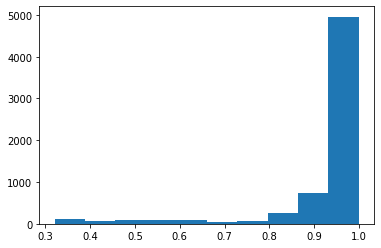

In [16]:
plt.hist(df["prob"], bins=20)

In [23]:
df = df.sort_values(by="prob")

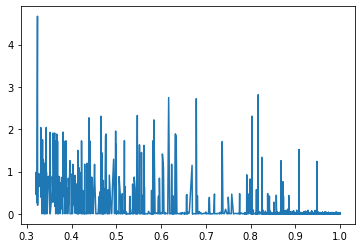

In [26]:
plt.plot(df["prob"], abs(df["Delta_z"]))

In [5]:
bins = np.linspace(0.32,1,20)
group = df.groupby(pd.cut(df.prob, bins))

In [6]:
plot_centers = (bins[:-1] + bins[1:])/2
plot_values = group.Delta_z.mean()

In [41]:
bins[:-1]

array([0.32      , 0.35578947, 0.39157895, 0.42736842, 0.46315789,
       0.49894737, 0.53473684, 0.57052632, 0.60631579, 0.64210526,
       0.67789474, 0.71368421, 0.74947368, 0.78526316, 0.82105263,
       0.85684211, 0.89263158, 0.92842105, 0.96421053])

In [42]:
bins[1:]

array([0.35578947, 0.39157895, 0.42736842, 0.46315789, 0.49894737,
       0.53473684, 0.57052632, 0.60631579, 0.64210526, 0.67789474,
       0.71368421, 0.74947368, 0.78526316, 0.82105263, 0.85684211,
       0.89263158, 0.92842105, 0.96421053, 1.        ])

In [43]:
bins[:-1] + bins[1:]

array([0.67578947, 0.74736842, 0.81894737, 0.89052632, 0.96210526,
       1.03368421, 1.10526316, 1.17684211, 1.24842105, 1.32      ,
       1.39157895, 1.46315789, 1.53473684, 1.60631579, 1.67789474,
       1.74947368, 1.82105263, 1.89263158, 1.96421053])

In [44]:
(bins[:-1] + bins[1:])/2

array([0.33789474, 0.37368421, 0.40947368, 0.44526316, 0.48105263,
       0.51684211, 0.55263158, 0.58842105, 0.62421053, 0.66      ,
       0.69578947, 0.73157895, 0.76736842, 0.80315789, 0.83894737,
       0.87473684, 0.91052632, 0.94631579, 0.98210526])

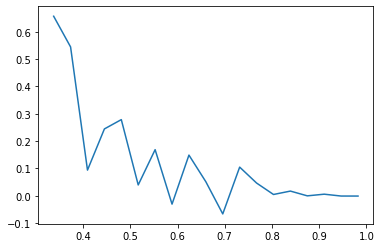

In [13]:
plt.plot(plot_centers, plot_values)

<BarContainer object of 19 artists>

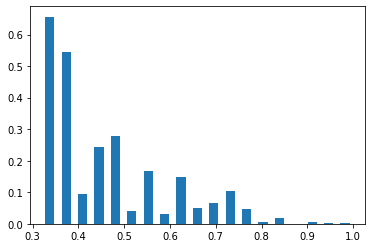

In [12]:
plt.bar(plot_centers, abs(plot_values), width=0.02)